In [2]:
!pip3 install cartopy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Task 1: Generate Synthetic Dataset to Simulate Global Air Travel

In [5]:
# Airports with latitudes and longitudes
airports = [
    {"code": "JFK", "city": "New York", "lat": 40.6413, "lon": -73.7781},
    {"code": "LHR", "city": "London", "lat": 51.4700, "lon": -0.4543},
    {"code": "DXB", "city": "Dubai", "lat": 25.2532, "lon": 55.3657},
    {"code": "HND", "city": "Tokyo", "lat": 35.5494, "lon": 139.7798},
    {"code": "SYD", "city": "Sydney", "lat": -33.8688, "lon": 151.2093},
    {"code": "GRU", "city": "São Paulo", "lat": -23.6273, "lon": -46.6566},
    {"code": "SIN", "city": "Singapore", "lat": 1.3644, "lon": 103.9915},
    {"code": "CDG", "city": "Paris", "lat": 49.0097, "lon": 2.5479}
]



In [6]:
# Create synthetic travel data
np.random.seed(42)
travel_data = []
for i, origin in enumerate(airports):
    for j, destination in enumerate(airports):
        if i != j:  # No self-loops
            passengers = np.random.randint(500, 10000)  # Random passenger count
            travel_data.append({
                "origin": origin["code"],
                "destination": destination["code"],
                "passengers": passengers
            })

travel_df = pd.DataFrame(travel_data)
travel_df.head()

,origin,destination,passengers
0,JFK,LHR,7770
1,JFK,DXB,1360
2,JFK,HND,5890
3,JFK,SYD,5691
4,JFK,GRU,6234


## Task 2: Create a Force-Directed Graph Visualization

In [7]:
# Build a graph from the dataset
graph = nx.DiGraph()

# Add nodes (airports) with lat/lon as attributes
for airport in airports:
    graph.add_node(
        airport["code"],
        city=airport["city"],
        pos=(airport["lon"], airport["lat"])
    )

# Add edges (travel routes) with passenger counts as weights
for _, row in travel_df.iterrows():
    graph.add_edge(row["origin"], row["destination"], weight=row["passengers"])

/opt/anaconda3/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/anaconda3/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


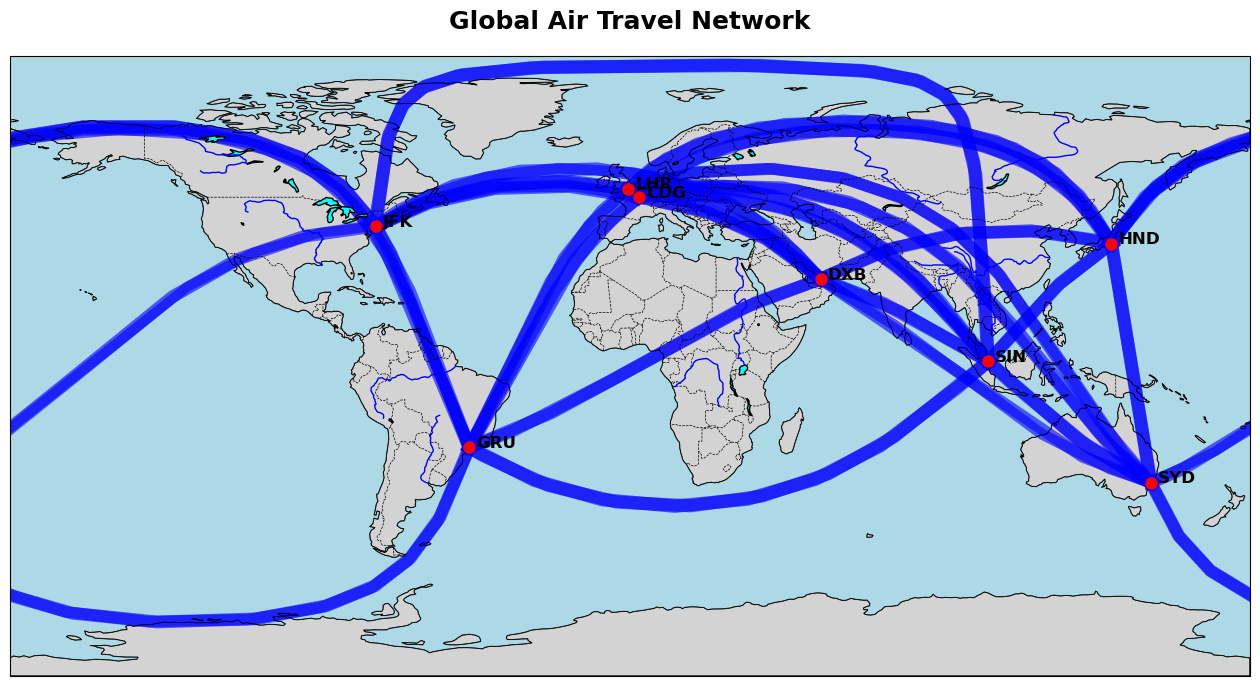

In [10]:
# Draw the graph on a map
fig, ax = plt.subplots(figsize=(16, 12), subplot_kw={"projection": ccrs.PlateCarree()})

# Set up Cartopy map features
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle='--', linewidth=0.5)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='aqua')
ax.add_feature(cfeature.RIVERS, edgecolor='blue')
ax.set_global()

# Extract positions for the graph nodes
positions = {node: (node_data["pos"][0], node_data["pos"][1]) for node, node_data in graph.nodes(data=True)}

# Draw nodes with customized visuals
for node, (lon, lat) in positions.items():
    ax.plot(lon, lat, 'o', color='red', markersize=8, transform=ccrs.Geodetic(), label=node)

# Draw edges with transparency and gradient effect based on weight
for origin, destination, data in graph.edges(data=True):
    origin_pos = positions[origin]
    destination_pos = positions[destination]
    ax.plot(
        [origin_pos[0], destination_pos[0]],
        [origin_pos[1], destination_pos[1]],
        color='blue', alpha=0.6, linewidth=np.log(data['weight']) + 0.5,
        transform=ccrs.Geodetic(),
        zorder=1
    )

# Add labels with clearer formatting
for node, (lon, lat) in positions.items():
    ax.text(lon + 2, lat, node, fontsize=12, fontweight='bold', color='black', transform=ccrs.Geodetic(), zorder=2)

# Title and legend
plt.title("Global Air Travel Network", fontsize=18, fontweight='bold', pad=20)
plt.show()
